## Description of the dataset:

name: Track title.

track_len: The duration of the track in minutes:seconds format.

link: Link to the track on the Yandex.Music website.

genre: The genre of the track.

artist(s): The artist or artists of the track (may contain multiple names).

chart: Position of the track in the chart (presumably top 100).

Explicit_content: Explicit content indicator (1 - present, 0 - not present).

monthly_listens_total: Total number of auditions of the performer(s) per month.

artists_likes_total: Number of likes for the artist(s) of the track.

## Analysis Goals

Determine which factors influence track popularity (important to business to understand how to better attract audience and promote it)

Analyze genres and their impact on the audience

Assess the impact of "Explicit" content on plays and likes

Analyze artist popularity and its effect on overall metrics ( important for planning collaborations with artists)

Data visualization for decision-making (help clearly understand trends)

In [2]:
import pandas as pd 
import pandasql as psql

import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/yandex-music-top100/yandex_tracks_top100.csv')
df.head()

,name,track_len,link,genre,artist(s),chart,Explicit_content,monthly_listens_total,artists_likes_total
0,Царица,3:35,https://music.yandex.ru//album/26605629/track/...,русская поп-музыка,['ANNA ASTI'],1,0,4847753,2120528
1,Плохая Девочка,2:15,https://music.yandex.ru//album/26697445/track/...,русский рэп,"['Винтаж', 'ТРАВМА', 'SKIDRI', 'DVRKLXGHT']",2,0,16677658,417013
2,Я плачу,1:54,https://music.yandex.ru//album/26607707/track/...,русская поп-музыка,['A.V.G'],3,0,4406023,287295
3,ASPHALT 8,2:15,https://music.yandex.ru//album/25361122/track/...,русский рэп,['MACAN'],4,0,5149399,2359899
4,Где прошла ты,2:48,https://music.yandex.ru//album/25163882/track/...,русский рэп,"['Кравц', 'Гио Пика']",5,0,9058111,1509523


In [4]:
#General Info about dataset 
df = df.rename(columns = {"artist(s)" : "artist"})
print("\n General information about dataset:")
print (df.info())

#Data Statistics 
print ("\n Statistics for numeric data:")
print(df.describe())

#Missing values 
print ("\n Check for missing values:")
print(df.isnull().sum())


 General information about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   100 non-null    object
 1   track_len              100 non-null    object
 2   link                   100 non-null    object
 3   genre                  100 non-null    object
 4   artist                 100 non-null    object
 5   chart                  100 non-null    int64 
 6   Explicit_content       100 non-null    int64 
 7   monthly_listens_total  100 non-null    int64 
 8   artists_likes_total    100 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 7.2+ KB
None

 Statistics for numeric data:
            chart  Explicit_content  monthly_listens_total  \
count  100.000000        100.000000           1.000000e+02   
mean    50.500000          0.220000           4.054831e+06   
std     29.011492          

**General Info:**

Type - Data Frame 

Columns - 9 

Rows - 100 

**Memory** - 7.2+ KB

**Statistic Info:**

chart: avg 50.5, max 100

Explicit_content: avg 0.22

monthly_listens_total: avg 4,054,831, max 16,677,660

artists_likes_total: avg 1,660,509, max 8,379,202

## 1. Determine the most popular genre

In [5]:
df_sql = df.copy()

sql_query = """

SELECT genre, 
    SUM(monthly_listens_total) as total_listens,
    SUM(artists_likes_total) as total_likes
FROM df_sql
GROUP BY genre 
ORDER BY total_listens DESC, total_likes DESC;

"""

#Run query 
result = psql.sqldf(sql_query, locals())

result.head()

,genre,total_listens,total_likes
0,русский рэп,181475383,62223435
1,русская поп-музыка,172165551,68155653
2,панк,30689647,25907410
3,русский рок,4805309,4044357
4,электроника,4686638,77680


SQL Summary:

Russian rap and Russian pop music are most popular genres with high count of listens and likes. They can bring more benefits for business. 


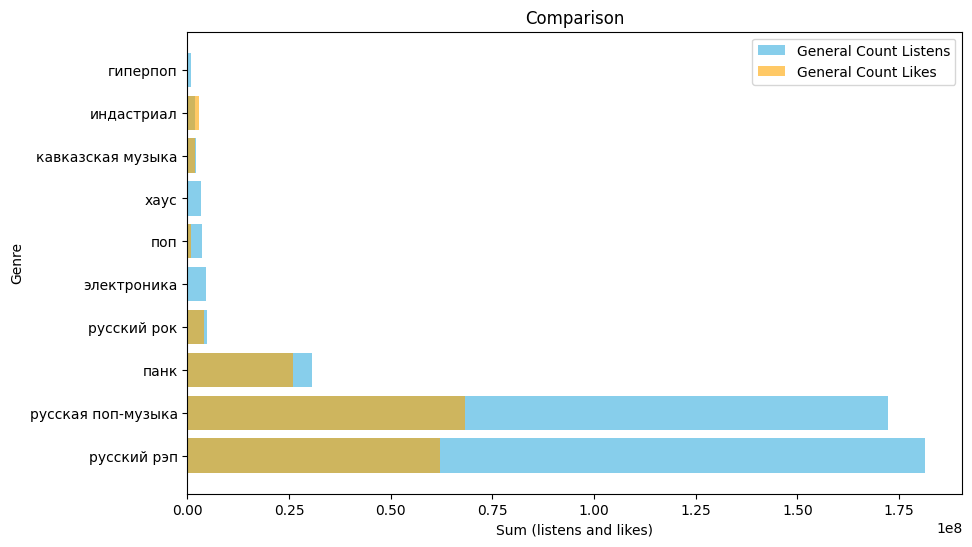

In [6]:
genre_summary_sorted =  result.sort_values(by = ["total_listens","total_likes"], ascending = [False, False])

# Creating bar chart 
plt.figure(figsize=(10,6))
plt.barh(genre_summary_sorted['genre'], genre_summary_sorted['total_listens'], color='skyblue', label='General Count Listens')
plt.barh(genre_summary_sorted['genre'], genre_summary_sorted['total_likes'], color='orange', alpha=0.6, label='General Count Likes')

# Addind labels 
plt.xlabel('Sum (listens and likes)')
plt.ylabel('Genre')
plt.title('Comparison')
plt.legend()

plt.show()

# Most Popular Artist 

In [7]:
df_sql = df.copy()

sql_query = """

Select
    artist,
    sum (monthly_listens_total) as total_listens,
    sum (artists_likes_total) as total_likes
From df_sql
Group By artist
ORDER By total_listens DESC, total_likes DESC
Limit 10;

"""

result = psql.sqldf(sql_query,locals())

result

,artist,total_listens,total_likes
0,['Король и Шут'],33637163,28310538
1,['ANNA ASTI'],29086518,12723207
2,['JONY'],17577825,14395063
3,"['Винтаж', 'ТРАВМА', 'SKIDRI', 'DVRKLXGHT']",16677658,417013
4,['MACAN'],15448197,7079709
5,"['Jakone', 'A.V.G', 'BAGARDI', 'Goro', 'Asatro']",13509502,375437
6,['A.V.G'],13218069,861892
7,['MOT'],11521982,7916211
8,"['Andro', 'ELMAN', 'TONI', 'MONA']",10805529,1049421
9,"['NILETTO', 'Олег Майами', 'Лёша Свик']",9595600,4662989


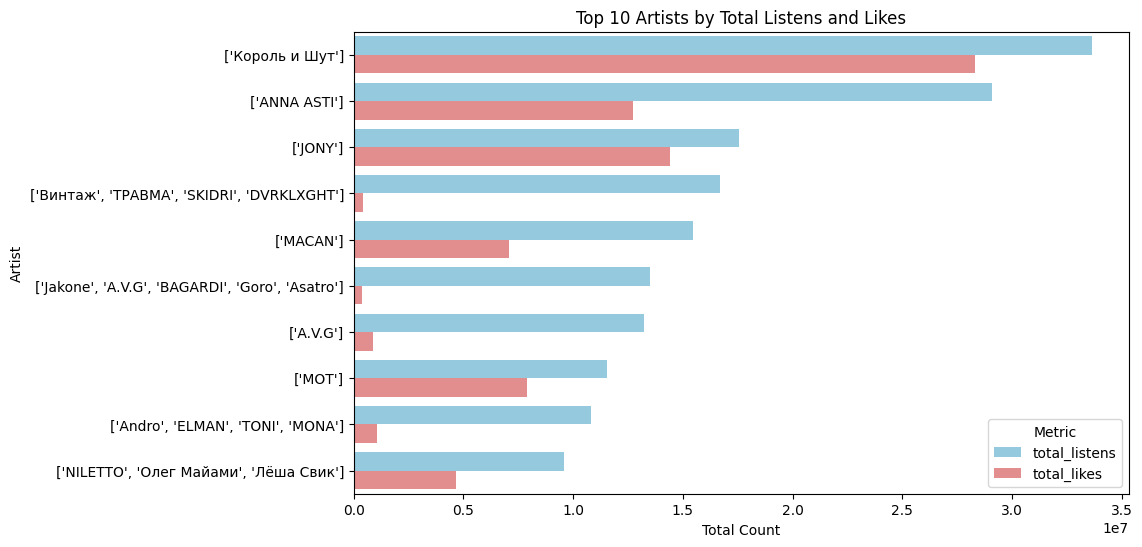

Top 10 artist analysis:
Most listened popular artist: ['Король и Шут']
listen count'['Король и Шут']': 33637163
----------------------------------------
Most liked artist: ['Король и Шут']
Like count '['Король и Шут']': 28310538


In [8]:
#Seaborn c hue
df_melted = pd.melt(result, id_vars='artist', value_vars=['total_listens', 'total_likes'], 
                    var_name='metric', value_name='total_count')

#Create diagram for top most liked and listened artists
plt.figure(figsize=(10, 6))

sns.barplot(x="total_count", y="artist", hue="metric", data=df_melted, 
            palette={"total_listens": "skyblue", "total_likes": "lightcoral"})

# Label Setting 
plt.title("Top 10 Artists by Total Listens and Likes")
plt.xlabel("Total Count")
plt.ylabel("Artist")


plt.legend(title="Metric")
plt.show()

# Most artist 
top_artist = result.iloc[0]['artist']

# Sort by total likes and listens 
result_sorted = result.sort_values(by=['total_listens', 'total_likes'], ascending=[False, False])

# Most listened artist 
top_artist_listens = result_sorted.iloc[0]['artist']
max_listens = result_sorted.iloc[0]['total_listens']

# Most liked artist 
top_artist_likes = result_sorted.iloc[0]['artist']
max_likes = result_sorted.iloc[0]['total_likes']

# Вывод текстовой информации о топ-10 исполнителях по прослушиваниям и лайкам
print("Top 10 artist analysis:")
print("========================================")
print(f"Most listened popular artist: {top_artist_listens}")
print(f"listen count'{top_artist_listens}': {max_listens}")
print("----------------------------------------")
print(f"Most liked artist: {top_artist_likes}")
print(f"Like count '{top_artist_likes}': {max_likes}")
print("========================================")

# Explicit Content Impact to Trend

Запрос подсчитывает среднее количество прослушиваний и лайков для треков с наличием и без наличия explicit-контента. Это позволяет определить, влияет ли присутствие откровенного контента на популярность треков и поведение слушателей.

In [9]:
df_sql_query = df.copy()


sql_query = """
SELECT 
    Explicit_content,
    AVG(monthly_listens_total) AS avg_listens,
    AVG(artists_likes_total) AS avg_likes
FROM df_sql_query
GROUP BY Explicit_content;
"""


df_result = psql.sqldf(sql_query, locals())
df_result

,Explicit_content,avg_listens,avg_likes
0,0,4.430434e+06,1.656291e+06
1,1,2.723148e+06,1.675464e+06


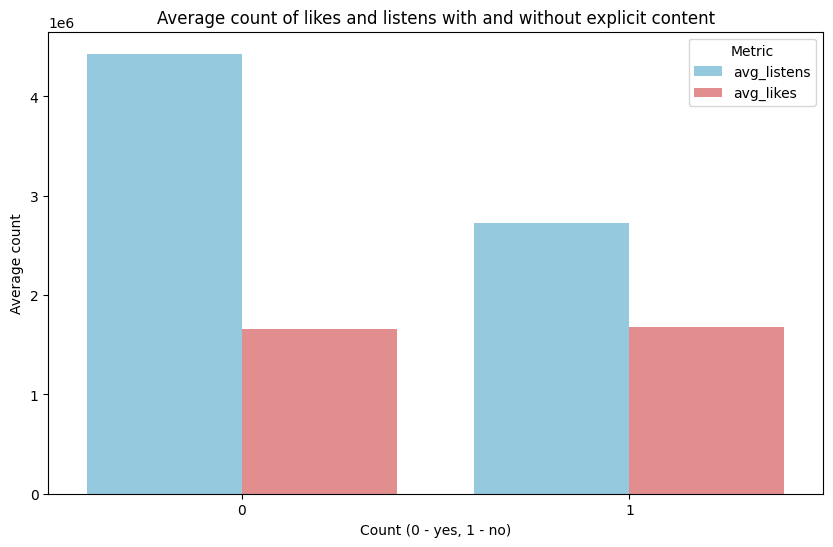

In [12]:
plt.figure(figsize=(10, 6))


df_melted = df_result.melt(id_vars='Explicit_content', 
                           value_vars=['avg_listens', 'avg_likes'], 
                           var_name='metric', value_name='average_count')


sns.barplot(x="Explicit_content", y="average_count", hue="metric", data=df_melted, 
            palette={"avg_listens": "skyblue", "avg_likes": "lightcoral"})


plt.title("Average count of likes and listens with and without explicit content")
plt.xlabel("Count (0 - yes, 1 - no)")
plt.ylabel("Average count")


plt.legend(title="Metric")
plt.show()


Conclusions:

Impact on listens: Tracks without explicit content are listened to more often, which may indicate a broader audience for such tracks—possibly due to their more neutral nature and appeal across all age groups.

Impact on likes: Despite having fewer listens, tracks with explicit content receive more likes, which may suggest a highly engaged audience.

# Track Duration Analysis 

In [13]:
df_sql_query = df.copy()


sql_query = """
SELECT 
    track_len, 
    AVG(monthly_listens_total) AS avg_listens, 
    AVG(artists_likes_total) AS avg_likes
FROM df
GROUP BY track_len;
"""


df_avg_duration = psql.sqldf(sql_query, locals())
df_avg_duration

,track_len,avg_listens,avg_likes
0,1:36,1335084.0,100710.0
1,1:43,1689427.5,113804.5
2,1:45,2342962.0,20185.0
3,1:50,2870553.5,194003.5
4,1:52,1142585.0,17471.0
...,...,...,...
72,4:17,4805309.0,4044372.0
73,4:28,2644389.0,151600.0
74,4:32,1840688.0,2789684.0
75,4:36,6008773.0,8379202.0


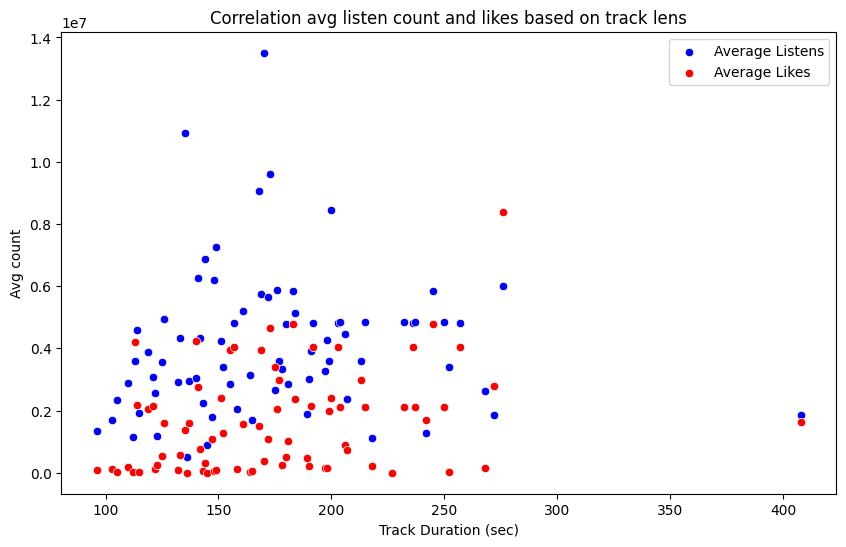

Track Duration Corrlation Analysis:
Correlation between song duration and listen count: 0.03
Correlation between song duration and like count: 0.30
---------------------------------------------------------
Positive correlation between song duration and listen count.
Positive correlation between song duration and like count.


In [14]:
# Refer duration time to minute format: sec in integer

def convert_to_seconds(track_len):
    minutes, seconds = map(int, track_len.split(':'))
    return minutes * 60 + seconds

# Converting to sec time
df_avg_duration['track_len_sec'] = df_avg_duration['track_len'].apply(convert_to_seconds)


plt.figure(figsize=(10, 6))

# Scatter for listens
sns.scatterplot(x="track_len_sec", y="avg_listens", data=df_avg_duration, label="Average Listens", color='blue')

# Diagram for likes
sns.scatterplot(x="track_len_sec", y="avg_likes", data=df_avg_duration, label="Average Likes", color='red')


plt.title("Correlation avg listen count and likes based on track lens")
plt.xlabel("Track Duration (sec)")
plt.ylabel("Avg count")
plt.legend()


plt.show()

# Correlation
corr_listens = df_avg_duration['avg_listens'].corr(df_avg_duration['track_len_sec'])
corr_likes = df_avg_duration['avg_likes'].corr(df_avg_duration['track_len_sec'])

# Summary 
print("Track Duration Corrlation Analysis:")
print("=========================================================")
print(f"Correlation between song duration and listen count: {corr_listens:.2f}")
print(f"Correlation between song duration and like count: {corr_likes:.2f}")
print("---------------------------------------------------------")


if corr_listens > 0:
    print("Positive correlation between song duration and listen count.")
else:
    print("Negative correlation between song duration and listen count")

# Интерпретация корреляции для лайков
if corr_likes > 0:
    print("Positive correlation between song duration and like count.")
else:
    print("Negative correlation between song duration and like count")

Text-Based Conclusions:

Listens:
Track duration has a very weak correlation with the number of listens. This may indicate that track length is not a significant factor in determining a track's popularity in terms of streams.

Likes:
Track duration has a moderate impact on the number of likes, suggesting that users may prefer tracks of a certain length, which influences their likelihood of giving likes.

Business Implications:
If the goal is to optimize track length for maximizing likes, attention should be given to the durations that receive the most likes. At the same time, since duration plays a lesser role in determining the number of listens, this should be taken into account when planning content strategy.

# Top 10 tracks based on likes and listen count

In [15]:
df_sql_query = df.copy()


sql_query = """
SELECT 
    name, 
    genre, 
    `artist` AS artist, 
    monthly_listens_total, 
    artists_likes_total
FROM df_sql_query
ORDER BY monthly_listens_total DESC, artists_likes_total DESC
LIMIT 10;
"""

top_10_tracks = psql.sqldf(sql_query, locals())

top_10_tracks

,name,genre,artist,monthly_listens_total,artists_likes_total
0,Плохая Девочка,русский рэп,"['Винтаж', 'ТРАВМА', 'SKIDRI', 'DVRKLXGHT']",16677658,417013
1,С тобой,русский рэп,"['Jakone', 'A.V.G', 'BAGARDI', 'Goro', 'Asatro']",13509502,375437
2,Зари,русская поп-музыка,"['Andro', 'ELMAN', 'TONI', 'MONA']",10805529,1049421
3,Не вспоминай,русская поп-музыка,"['NILETTO', 'Олег Майами', 'Лёша Свик']",9595600,4662989
4,Поспешили,русский рэп,"['MACAN', 'Jakone']",9094105,2414815
5,Где прошла ты,русский рэп,"['Кравц', 'Гио Пика']",9058111,1509523
6,IVL,русский рэп,"['MACAN', 'SCIRENA']",8454285,2408336
7,money,русская поп-музыка,"['By Индия', 'The Limba']",8014390,790421
8,По весне,русская поп-музыка,"['Jakone', 'SCIRENA']",7249592,103349
9,Она близко,русский рэп,"['A.V.G', 'Goro']",6888389,307984


In [17]:
genre_counts = top_10_tracks['genre'].value_counts()

print("Frequent genre in top 10 songs:")
print(genre_counts)

top_10_tracks["artist_list"] = top_10_tracks["artist"].apply(lambda x: x.strip("[]").split(", "))
artist_counts = top_10_tracks.explode('artist_list')['artist_list'].value_counts()

print("\nFrequent artist in top 10 songs:")
print(artist_counts)

Frequent genre in top 10 songs:
genre
русский рэп           6
русская поп-музыка    4
Name: count, dtype: int64

Frequent artist in top 10 songs:
artist_list
'Jakone'         3
'SCIRENA'        2
'A.V.G'          2
'Goro'           2
'MACAN'          2
'Винтаж'         1
'NILETTO'        1
'By Индия'       1
'Гио Пика'       1
'Кравц'          1
'Лёша Свик'      1
'Олег Майами'    1
'TONI'           1
'MONA'           1
'ТРАВМА'         1
'ELMAN'          1
'Andro'          1
'Asatro'         1
'BAGARDI'        1
'DVRKLXGHT'      1
'SKIDRI'         1
'The Limba'      1
Name: count, dtype: int64


# Overall Project Summary:

The music track data analysis project includes the following key aspects:

🔝 Popular Artists Analysis:
The Top 10 artists by number of streams and likes were identified.

The most popular artist is "Король и Шут".

Genres & Artists: The leading genres are Russian rap and Russian pop music. Frequently appearing artists include Jakone, SCIRENA, and A.V.G.

⚠️ Impact of Explicit Content:
Tracks with explicit content receive more likes on average but fewer listens compared to non-explicit tracks.

⏱️ Track Duration vs Popularity:
A weak positive correlation was found between track duration and number of likes (0.245).

A very weak correlation with the number of listens (0.019).

This indicates that track duration has minimal influence on overall popularity.

📊 Track Duration Analysis:
Scatter plots show no strong trends, but there is a slight increase in both likes and listens with longer track duration.

🔗 Correlation Analysis:
The correlation coefficient between track duration and listens is  low, indicating no significant relationship.

The correlation with likes is slightly higher, suggesting some connection between track length and likeability.

🎧 Top 10 Tracks:
The top 10 tracks by listens and likes are dominated by Russian rap and Russian pop genres.

Common top artists include Jakone, SCIRENA, and A.V.G.


💡 Recommendations:
Consider genre preferences and the effect of explicit content when producing and promoting tracks.

Use identified duration trends to optimize content and marketing strategies.

Continue investigating factors influencing track popularity to improve music recommendations.

